# Customer Analysis #
**Regression Model** 
<br>
*Data on the customers of a car insurance company*
<br>
*Goal is to predict total claim amount*

In [314]:
# Lab 4.01

In [315]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [316]:
customer_df = pd.read_csv('lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [317]:
def col_names (data):
    """standardizes columns names: lowercase, removes spaces 
    at the beginning and at the end, replaces spaces with underscore"""
    cols = data.columns
    new_cols =[]
    for col in cols:
        new_col = col.lower().strip().replace(" ", "_")
        new_cols.append(new_col)
    data.columns = new_cols
    return

col_names(customer_df)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [318]:
customer_df.shape

(9134, 24)

In [319]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [320]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [321]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [322]:
customer_df['effective_to_week'] = customer_df['effective_to_date'].dt.isocalendar().week

In [323]:
for i in customer_df.columns:
    print (i)
    print(len(customer_df[i].unique()))

customer
9134
state
5
customer_lifetime_value
8041
response
2
coverage
3
education
5
effective_to_date
59
employmentstatus
5
gender
2
income
5694
location_code
3
marital_status
3
monthly_premium_auto
202
months_since_last_claim
36
months_since_policy_inception
100
number_of_open_complaints
6
number_of_policies
9
policy_type
3
policy
9
renew_offer_type
4
sales_channel
4
total_claim_amount
5106
vehicle_class
6
vehicle_size
3
effective_to_week
10


In [324]:
for i in customer_df:
    print(customer_df[i].value_counts())

DW88734    1
XX29952    1
AG22225    1
IS95117    1
LM58949    1
          ..
EW16697    1
CH38655    1
LK19630    1
HJ37943    1
NG94479    1
Name: customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
2248.449633     6
10972.067780    6
5619.689084     6
11981.984810    6
2530.705137     6
               ..
12349.702320    1
4046.936065     1
2121.313061     1
7232.609391     1
3297.904615     1
Name: customer_lifetime_value, Length: 8041, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-03    178
201

<AxesSubplot:xlabel='months_since_last_claim', ylabel='Count'>

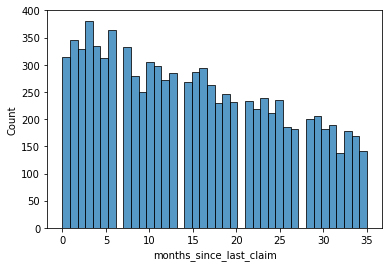

In [325]:
sns.histplot(data['months_since_last_claim'], bins = 40)

In [326]:
def num_cat_split(df):
    global num
    global cat
    num = pd.DataFrame()
    cat = pd.DataFrame()
    for i in df.columns:
        if len(df[i].unique()) > 10:
            num[i] = df[i]
        else:
            cat[i] = df[i]

In [327]:
num_cat_split(customer_df)

In [328]:
num.head()

,customer,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,BU79786,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,QZ44356,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,AI49188,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,WW63253,7645.861827,2011-01-20,0,106,18,65,529.881344
4,HB64268,2813.692575,2011-02-03,43836,73,12,44,138.130879


In [329]:
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_week
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,8
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,5
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,7
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,3
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,5


In [330]:
num.dtypes

customer                                 object
customer_lifetime_value                 float64
effective_to_date                datetime64[ns]
income                                    int64
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
total_claim_amount                      float64
dtype: object

In [331]:
num = num.drop((['customer', 'effective_to_date']), axis = 1)

In [332]:
num.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
total_claim_amount               float64
dtype: object

In [333]:
cat.dtypes

state                        object
response                     object
coverage                     object
education                    object
employmentstatus             object
gender                       object
location_code                object
marital_status               object
number_of_open_complaints     int64
number_of_policies            int64
policy_type                  object
policy                       object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
effective_to_week            UInt32
dtype: object

In [334]:
# Lab 4.02

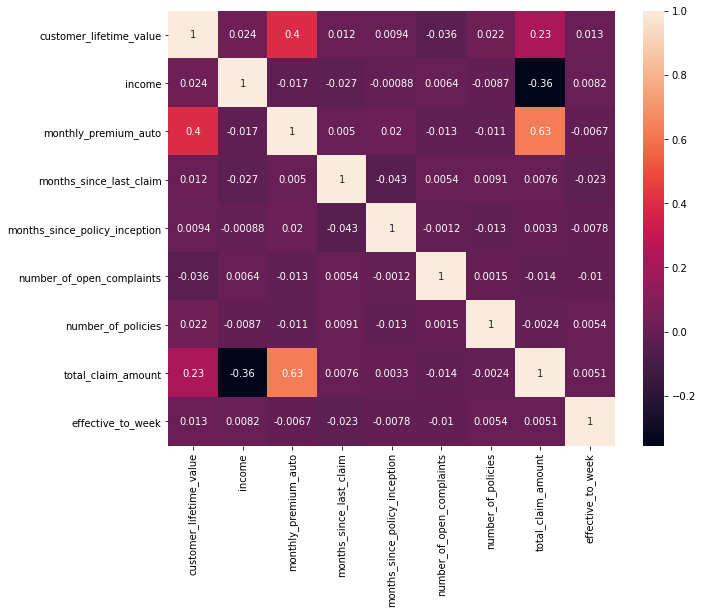

In [335]:
corr_matrix=customer_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)  # annot true is to show coefficients
plt.show()

In [336]:
# distribution

In [337]:
# def plot_cat(df):
#     for i in range(df.shape[1]):
#         sns.histplot(df[df.columns[i]], bins=40)
#         plt.show()
        
# plot_cat(cat)

In [338]:
def plot_cat2(df):
    for i in range(df.shape[1]):
        sns.barplot(x = df[df.columns[i]].value_counts().index, y = df[df.columns[i]].value_counts())
        plt.show()

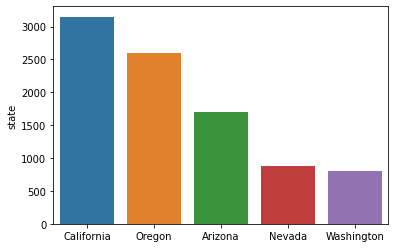

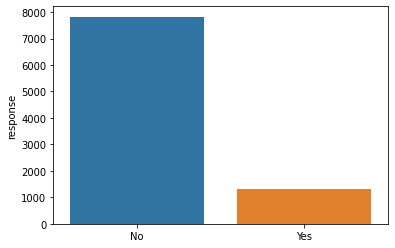

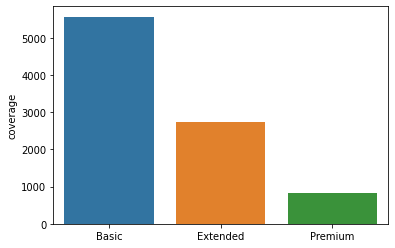

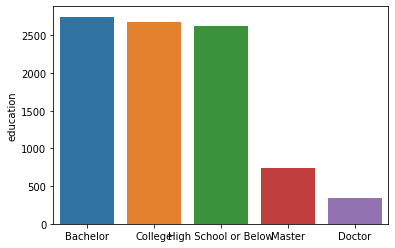

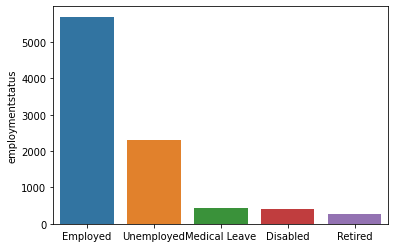

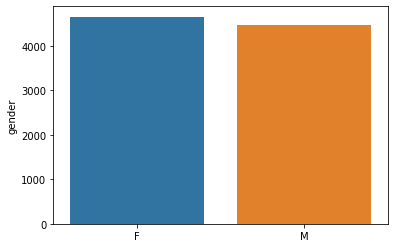

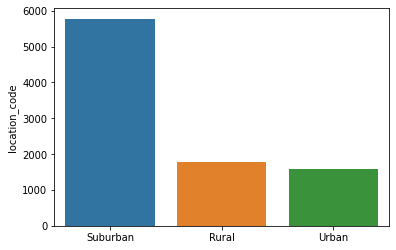

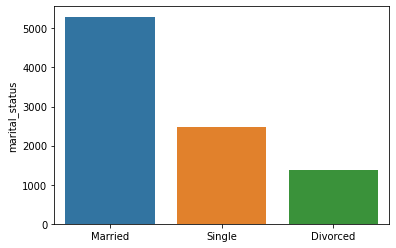

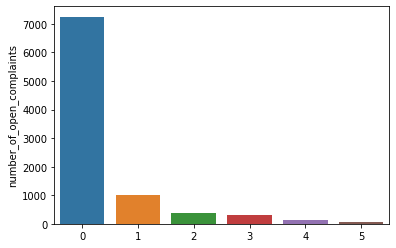

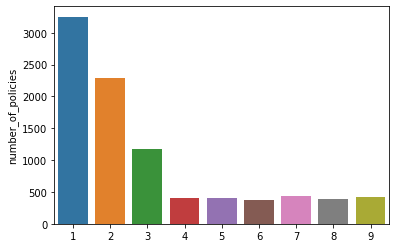

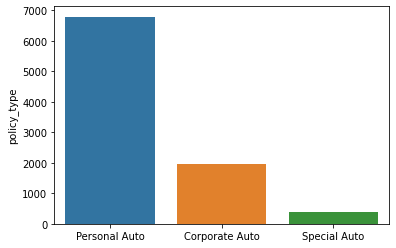

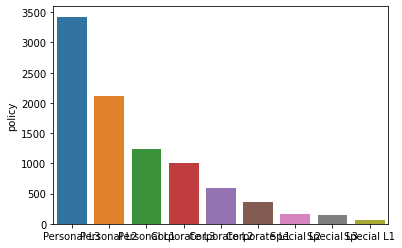

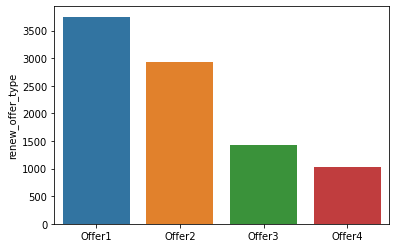

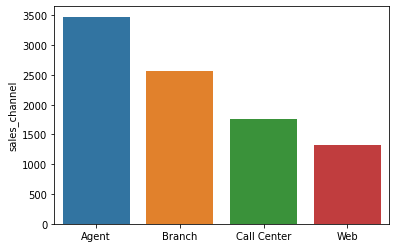

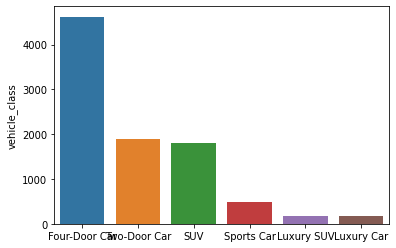

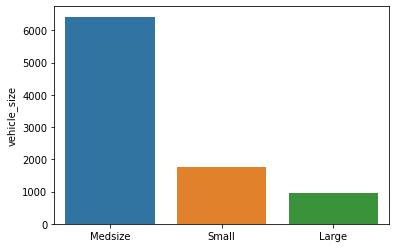

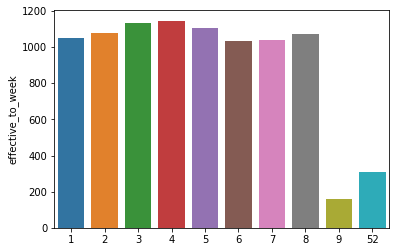

In [339]:
plot_cat2(cat)

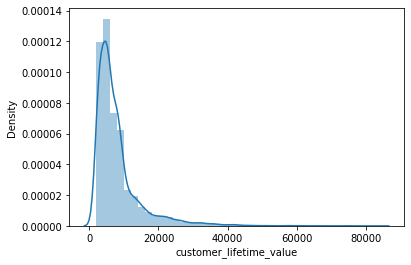

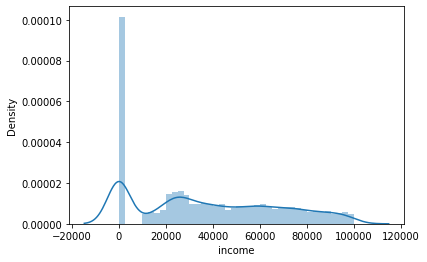

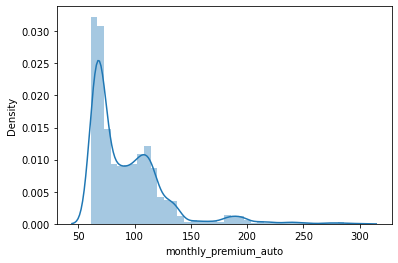

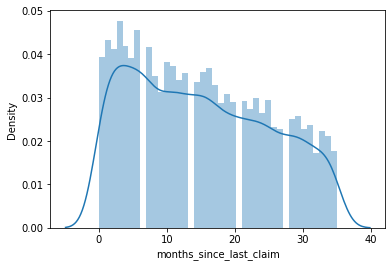

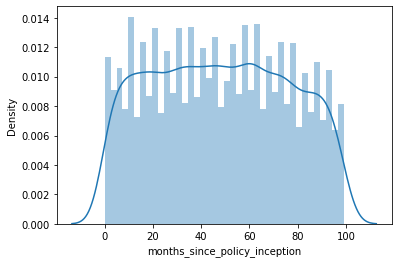

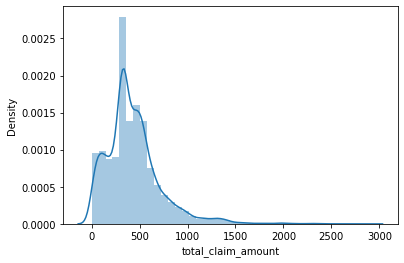

In [340]:
def plot_num(df):
    for i in range(df.shape[1]):
        sns.distplot(df[df.columns[i]], bins=40)
        plt.show()
        
plot_num(num)

In [341]:
# outliers

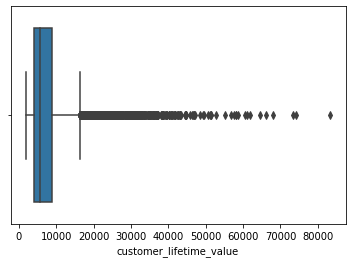

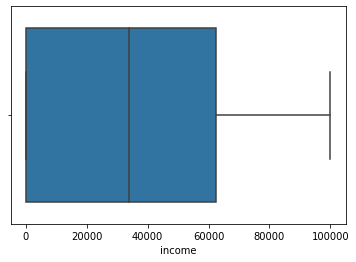

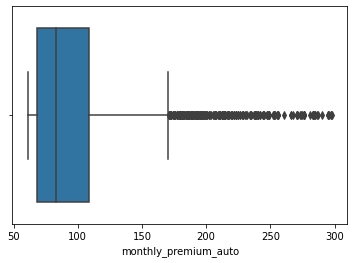

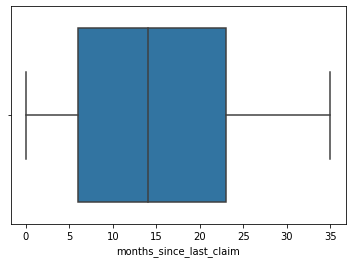

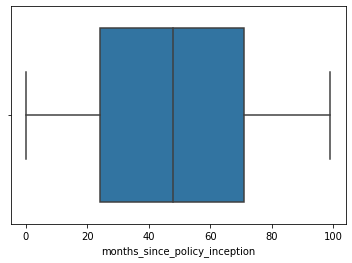

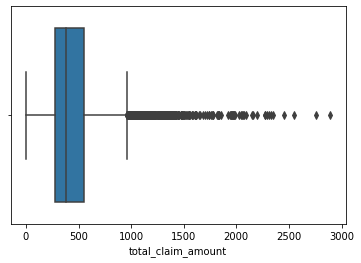

In [342]:
for i in range(num.shape[1]):
    sns.boxplot(num[num.columns[i]])
    plt.show()

In [343]:
iqr = np.percentile(num['customer_lifetime_value'],75) - np.percentile(num['customer_lifetime_value'],25)
upper_limit = np.percentile(num['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(num['customer_lifetime_value'],25) - 1.5*iqr

num_copy = num[(num['customer_lifetime_value']>lower_limit) & (data['customer_lifetime_value']<upper_limit)]

num_copy.shape[0] - num.shape[0]

-817

In [344]:
# removing outliers will remove 10% of the observations. not a good idea

In [345]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x>0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

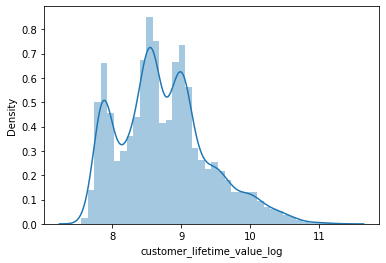

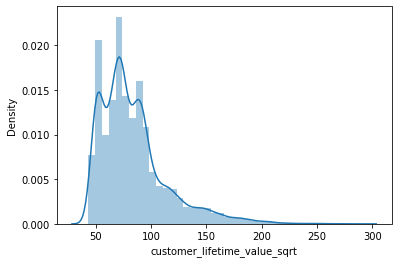

In [348]:
num['customer_lifetime_value_log'] = num['customer_lifetime_value'].apply(log_transfom_clean_)
num['customer_lifetime_value_sqrt'] = num['customer_lifetime_value'].apply(sqrt_transfom_clean_)

sns.distplot(num['customer_lifetime_value_log'], bins=40)
plt.show()

sns.distplot(num['customer_lifetime_value_sqrt'], bins=40)
plt.show()

In [ ]:
# f, ax = plt.subplots(1, 3, figsize=(16,8))

# for i, col in enumerate(continuous_df.iloc[:,0:3]):
#     sns.boxplot(data = continuous_df[col], ax = ax[i])
#     ax[i].set_title(col, fontsize = 14)

# plt.show()

In [ ]:
num['monthly_premium_auto_log'] = num['monthly_premium_auto'].apply(log_transfom_clean_)
num['monthly_premium_auto_sqrt'] = num['monthly_premium_auto'].apply(sqrt_transfom_clean_)

sns.distplot(num['monthly_premium_auto_log'], bins=40)
plt.show()

sns.distplot(num['monthly_premium_auto_sqrt'], bins=40)
plt.show()

In [ ]:
num = num.drop(
    (['monthly_premium_auto', 'monthly_premium_auto_sqrt', 
      'customer_lifetime_value', 'customer_lifetime_value_sqrt']), 
    axis = 1, errors = 'ignore'
    )

In [ ]:
# replace the NaNs after the log transformation
# remove outliers after the transformation if needed (do that on the total df, not on num)

In [ ]:
num.isna().sum()